In [2]:
from io import StringIO
import requests

import requests
import logging
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

url = "http://localhost:8989/spt?point=52.378523556085064,4.900950625832426&time_limit=1800&locale=en-US&profile=car"

payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)
csvStringIO = StringIO(response.text)

df = pd.read_csv(csvStringIO)

df['geometry'] = df.apply(lambda x: Point(x.longitude, x.latitude), axis=1)
gdf = gpd.GeoDataFrame(df, crs='EPSG:4326')
gdf


,longitude,latitude,time,distance,geometry
0,4.901700,52.379285,0,0,POINT (4.90170 52.37929)
1,4.902685,52.378924,6245,78,POINT (4.90268 52.37892)
2,4.904357,52.378351,16672,208,POINT (4.90436 52.37835)
3,4.904407,52.378337,16973,212,POINT (4.90441 52.37834)
4,4.904851,52.378233,19551,244,POINT (4.90485 52.37823)
...,...,...,...,...,...
213589,5.018297,52.330368,1206984,18524,POINT (5.01830 52.33037)
213590,5.018074,52.330323,1208903,18540,POINT (5.01807 52.33032)
213591,5.017376,52.330178,1214915,18590,POINT (5.01738 52.33018)
213592,5.124681,52.300056,1478154,23599,POINT (5.12468 52.30006)


<Axes: >

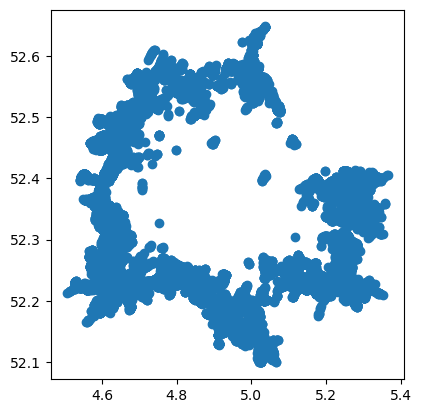

In [4]:
gdf[gdf.time > gdf.time.quantile(0.7)].plot()